In [0]:
import tensorflow
from keras.optimizers import SGD
from keras import regularizers

In [0]:
from __future__ import print_function
import keras
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from PIL import Image
import cv2
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 32, 32

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
X_train = []
X_test = []
for i in range(len(x_train)):
  X_train.append(cv2.resize(x_train[i], (32,32)))

for i in range(len(x_test)):
  X_test.append(cv2.resize(x_test[i], (32,32)))

X_train = numpy.asarray(X_train) 
X_test = numpy.asarray(X_test)

In [3]:
if K.image_data_format() == 'channels_first':
    x_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    x_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#Convert to float and then normalize the images by dividing by 255(max value of a pixel)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 32, 32, 1)
60000 train samples
10000 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [19]:
#We add regularization constant of 0.001  (L2 regularization)
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=input_shape,kernel_regularizer=regularizers.l2(0.01), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.001), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.001 ), padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.001 ), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.001 ), padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.001 ), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.001), padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.001), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2, 2))) 
model.add(Flatten()) 
model.add(Dense(4096, activation='relu',kernel_regularizer=regularizers.l2(0.001 )))
model.add(Dense(4096, activation='relu',kernel_regularizer=regularizers.l2(0.001 )))
model.add(Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001)))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 64)        640       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 8, 8, 256)         590080    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 4, 4, 256)         0         
__________

In [0]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [21]:
history = model.fit(x_train, y_train, batch_size=32, validation_data=(x_test,y_test), epochs=10, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 135s 2ms/step - loss: 6.9398 - acc: 0.6261 - val_loss: 4.1431 - val_acc: 0.9732
Epoch 2/10
60000/60000 [==============================] - 130s 2ms/step - loss: 2.9901 - acc: 0.9717 - val_loss: 2.0578 - val_acc: 0.9798
Epoch 3/10
60000/60000 [==============================] - 130s 2ms/step - loss: 1.5153 - acc: 0.9794 - val_loss: 1.0861 - val_acc: 0.9792
Epoch 4/10
60000/60000 [==============================] - 130s 2ms/step - loss: 0.8191 - acc: 0.9816 - val_loss: 0.6045 - val_acc: 0.9841
Epoch 5/10
60000/60000 [==============================] - 130s 2ms/step - loss: 0.4879 - acc: 0.9834 - val_loss: 0.3798 - val_acc: 0.9861
Epoch 6/10
60000/60000 [==============================] - 131s 2ms/step - loss: 0.3286 - acc: 0.9838 - val_loss: 0.2838 - val_acc: 0.9833
Epoch 7/10
60000/60000 [==============================] - 131s 2ms/step - loss: 0.2519 - acc: 0.9847 - val_loss: 0.2740 - 

In [22]:
score = model.evaluate(x_test, y_test, batch_size=32)
print(score)

10000/10000 [==============================] - 5s 529us/step
[0.18145463039875032, 0.9861]


In [23]:
print("History", history.history)
print("history.history.keys():", history.history.keys())

History {'val_loss': [4.143069383239746, 2.0578493068695067, 1.0861302642822266, 0.6045008671760559, 0.37981229286193846, 0.28376878037452696, 0.2740239696264267, 0.22868434433937074, 0.19635534541606903, 0.18145463039875032], 'val_acc': [0.9732, 0.9798, 0.9792, 0.9841, 0.9861, 0.9833, 0.9749, 0.9763, 0.9844, 0.9861], 'loss': [6.939784062194824, 2.9900779248555502, 1.5152657278060913, 0.8190619910558065, 0.48787217200597127, 0.3285701893011729, 0.25193846286932625, 0.21493756291866303, 0.19628630491892496, 0.1831802503824234], 'acc': [0.6260833333333333, 0.9717166666666667, 0.9794333333333334, 0.9816333333333334, 0.98345, 0.9838333333333333, 0.9847333333333333, 0.9850666666666666, 0.9852333333333333, 0.98715]}
history.history.keys(): dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


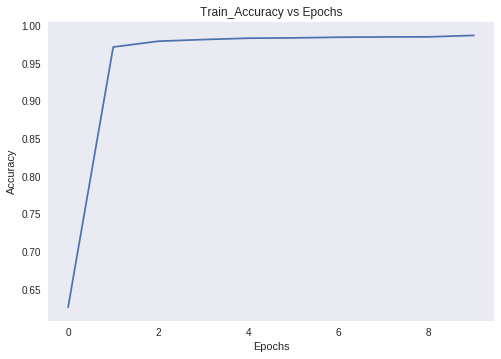

In [24]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('Train_Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.show()

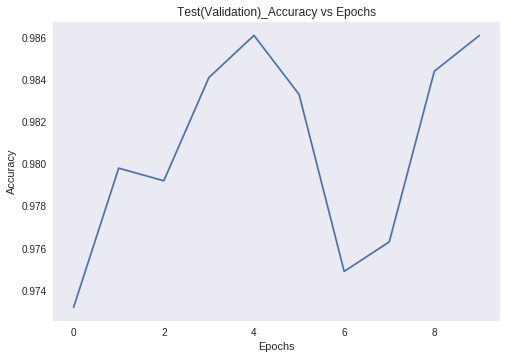

In [25]:
plt.plot(history.history['val_acc'])
plt.title('Test(Validation)_Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.show()

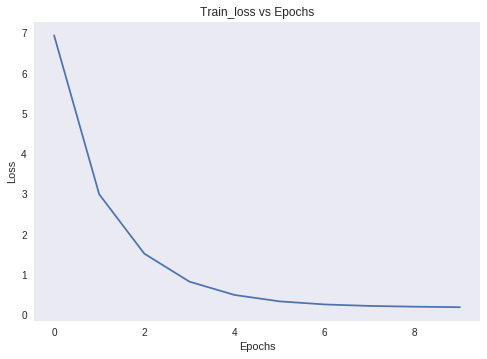

In [26]:
plt.plot(history.history['loss'])
plt.title('Train_loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.grid()
plt.show()

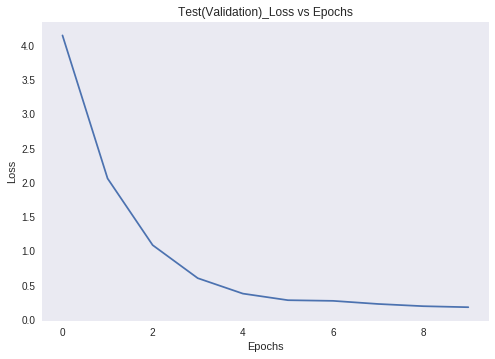

In [27]:
plt.plot(history.history['val_loss'])
plt.title('Test(Validation)_Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.grid()
plt.show()

In [28]:
s_loss = []
s_acc = []
for j in range(-45,50,5):
  rotate_test_x = []
  for i in range(len(X_test)):
    X_test_rotate = Image.fromarray(X_test[i])
    new_image = X_test_rotate.rotate(j)
    img_array = numpy.array(new_image)
    rotate_test_x.append(img_array)
  X_test_rotate = numpy.asarray(rotate_test_x)
  X_test_rotate = X_test_rotate.reshape(X_test_rotate.shape[0], img_rows, img_cols, 1)
  score = model.evaluate(X_test_rotate, y_test, batch_size=32)
  print("Rotation degree: " +str(j) + " Score:" + str(score))
  s_loss.append(score[0])
  s_acc.append(score[1])

10000/10000 [==============================] - 5s 536us/step
Rotation degree: -45 Score:[8.439601834869384, 0.4814]
10000/10000 [==============================] - 5s 522us/step
Rotation degree: -40 Score:[6.714005543899536, 0.589]
10000/10000 [==============================] - 5s 525us/step
Rotation degree: -35 Score:[5.110840104818344, 0.6889]
10000/10000 [==============================] - 5s 518us/step
Rotation degree: -30 Score:[3.5404354447841646, 0.7866]
10000/10000 [==============================] - 5s 519us/step
Rotation degree: -25 Score:[2.244192848205566, 0.8678]
10000/10000 [==============================] - 5s 518us/step
Rotation degree: -20 Score:[1.3582411518096924, 0.9232]
10000/10000 [==============================] - 5s 519us/step
Rotation degree: -15 Score:[0.8178639618635177, 0.9572]
10000/10000 [==============================] - 5s 521us/step
Rotation degree: -10 Score:[0.5553975246191025, 0.9734]
10000/10000 [==============================] - 5s 519us/step
Rotation

In [29]:
s_loss

[8.439601834869384,
 6.714005543899536,
 5.110840104818344,
 3.5404354447841646,
 2.244192848205566,
 1.3582411518096924,
 0.8178639618635177,
 0.5553975246191025,
 0.4584701637506485,
 0.39120862691402436,
 0.47080748364925384,
 0.5828770918130874,
 0.7753211725950241,
 1.1575856167793275,
 1.7821538168430329,
 2.70450921125412,
 4.016278053951264,
 5.466768901395798,
 6.93717942314148]

In [30]:
s_acc

[0.4814,
 0.589,
 0.6889,
 0.7866,
 0.8678,
 0.9232,
 0.9572,
 0.9734,
 0.9797,
 0.9839,
 0.9792,
 0.9721,
 0.9597,
 0.9361,
 0.8962,
 0.8389,
 0.7577,
 0.6661,
 0.5757]

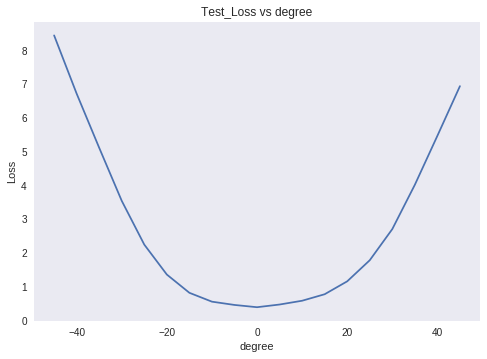

In [31]:
plt.plot( range(-45,50,5), s_loss)
plt.title('Test_Loss vs degree')
plt.ylabel('Loss')
plt.xlabel('degree')
plt.grid()
plt.show()

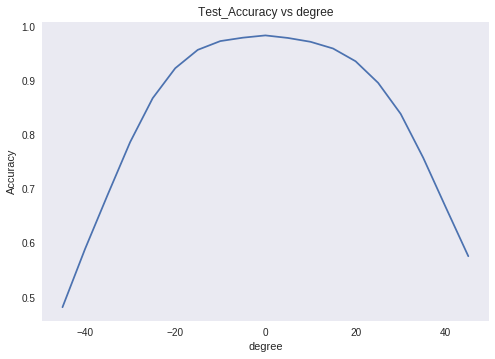

In [32]:
plt.plot( range(-45,50,5), s_acc)
plt.title('Test_Accuracy vs degree')
plt.ylabel('Accuracy')
plt.xlabel('degree')
plt.grid()
plt.show()

In [33]:
from PIL import ImageFilter
s_loss = []
s_acc = []
for j in range(0,7):
  filter_test_x = []
  for i in range(len(X_test)):
    X_test_filter = Image.fromarray(X_test[i])
    new_image = X_test_filter.filter(ImageFilter.GaussianBlur(radius=j))
    img_array = numpy.array(new_image)
    filter_test_x.append(img_array)
  X_test_filter = numpy.asarray(filter_test_x)
  X_test_filter = X_test_filter.reshape(X_test_filter.shape[0], img_rows, img_cols, 1)
  score = model.evaluate(X_test_filter, y_test, batch_size=32)
  print("Filter radius: " +str(j) + " Score:" + str(score))
  s_loss.append(score[0])
  s_acc.append(score[1])

10000/10000 [==============================] - 5s 536us/step
Filter radius: 0 Score:[0.39120862691402436, 0.9839]
10000/10000 [==============================] - 5s 519us/step
Filter radius: 1 Score:[0.4019737101793289, 0.9835]
10000/10000 [==============================] - 5s 523us/step
Filter radius: 2 Score:[0.6802522034883499, 0.965]
10000/10000 [==============================] - 5s 521us/step
Filter radius: 3 Score:[2.888186405754089, 0.82]
10000/10000 [==============================] - 5s 519us/step
Filter radius: 4 Score:[7.416354692077637, 0.529]
10000/10000 [==============================] - 5s 521us/step
Filter radius: 5 Score:[10.558487956237792, 0.3178]
10000/10000 [==============================] - 5s 519us/step
Filter radius: 6 Score:[12.295349296569825, 0.1799]


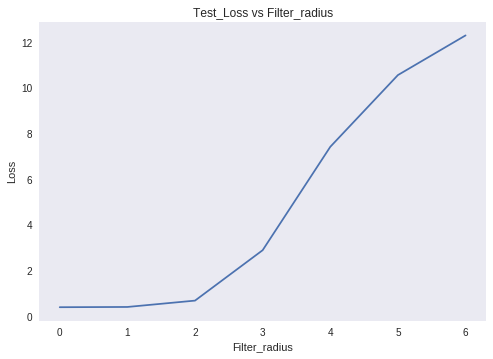

In [34]:
plt.plot( range(0,7), s_loss)
plt.title('Test_Loss vs Filter_radius')
plt.ylabel('Loss')
plt.xlabel('Filter_radius')
plt.grid()
plt.show()

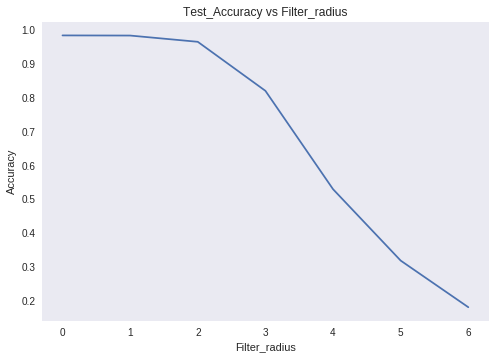

In [35]:
plt.plot( range(0,7), s_acc)
plt.title('Test_Accuracy vs Filter_radius')
plt.ylabel('Accuracy')
plt.xlabel('Filter_radius')
plt.grid()
plt.show()